In [37]:
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
from src.dataset import Para, ParaDeforestationTime, ParaDistanceMap, ParaMultipleDates
from osgeo import gdal
import src.plot as _plt


In [2]:
label_with_cloud_mask = np.load('D:/Jorge/datasets/deforestation/Para_2018_2019/mask_label_17730x9203.npy')


In [3]:
label_with_cloud_mask.shape

(17730, 9203)

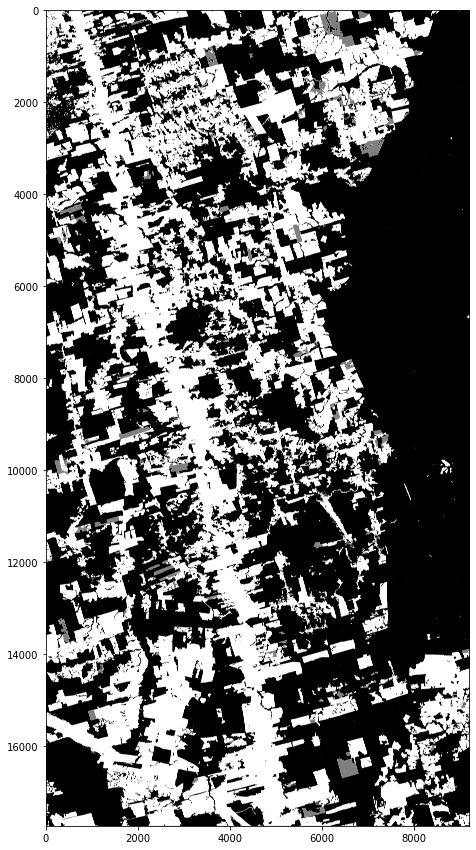

In [47]:
plt.figure(figsize=(15,15))
plt.imshow(label_with_cloud_mask, cmap=plt.cm.gray)
# title_name = 'ResUnet'
# plt.axis('off')
# plt.savefig('figures/Para' + title_name + ' error mask.png', dpi=150, bbox_inches='tight')

In [20]:
addPastDeforestationInput = True
dataset = ParaMultipleDates(dates = [2018, 2019], # dates = [2017, 2018, 2019]
	addPastDeforestationInput = addPastDeforestationInput,
	borderBuffer = 2)

ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [21]:
# Loading reference
label_mask = dataset.loadLabel()
print('Mask label shape: ', '\n', label_mask.shape, '\n', 'Unique values: ', '\n', np.unique(label_mask))

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
                                                                    2016., 2017., 2018., 2019., 2020.], dtype=float32),
                                                              array([135749947,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2206326,
                                                                      2053114,   5257014], dtype=int64))


Label where deforestation past years is actual date (2018) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
                                                                    2016., 2017., 2018., 2019., 2020.], dtype=float32),
                                                              array([135749947,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2206326,
                                                                      2053114,   5257014], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
                                                                    2016., 2017., 2018., 2019., 2020.], dtype=float32),
                                                              array([135749947,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2206326,
                                                                      2053114,   5257014], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([0., 1.], dtype=float32), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
                                                                    2016., 2017., 2018., 2019., 2020.], dtype=float32),
                                                              array([135749947,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2206326,
                                                                      2053114,   5257014], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [35]:
# Loading image stack
image_stack = dataset.loadInputImage()

print('Image shape: ', image_stack.shape)
channels = image_stack.shape[-1]

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)


(-0.5, 9202.5, 17729.5, -0.5)

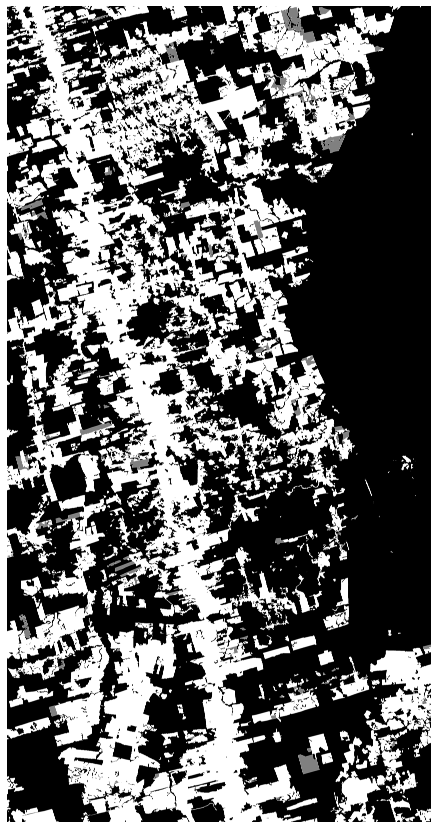

In [22]:
plt.figure(figsize=(15,15))
plt.imshow(label_mask, cmap=plt.cm.gray)
# title_name = 'ResUnet'
plt.axis('off')
# plt.savefig('figures/Para' + title_name + ' error mask.png', dpi=150, bbox_inches='tight')

In [23]:
def load_tiff_image(path):
    # Read tiff Image
    print (path) 
    gdal_header = gdal.Open(path)
    im = gdal_header.ReadAsArray()
    return im

In [24]:
# Load cirrus band for thin cloud detection
band_path = 'D:/Jorge/datasets/sentinel2/Para_2019/COPERNICUS_S2_20190721_20190726_B9_B10_B11.tif'
cirrus_t1 = load_tiff_image(band_path)[1]

D:/Jorge/datasets/sentinel2/Para_2019/COPERNICUS_S2_20190721_20190726_B9_B10_B11.tif


In [25]:
# Load cirrus band for thin cloud detection
band_path = 'D:/Jorge/datasets/sentinel2/Para_2018/COPERNICUS_S2_20180721_20180726_B9_B10_B11.tif'
cirrus_t0 = load_tiff_image(band_path)[1]

D:/Jorge/datasets/sentinel2/Para_2018/COPERNICUS_S2_20180721_20180726_B9_B10_B11.tif


In [26]:
print(cirrus_t0.shape, cirrus_t1.shape)

(17730, 9203) (17730, 9203)


(-0.5, 9202.5, 17729.5, -0.5)

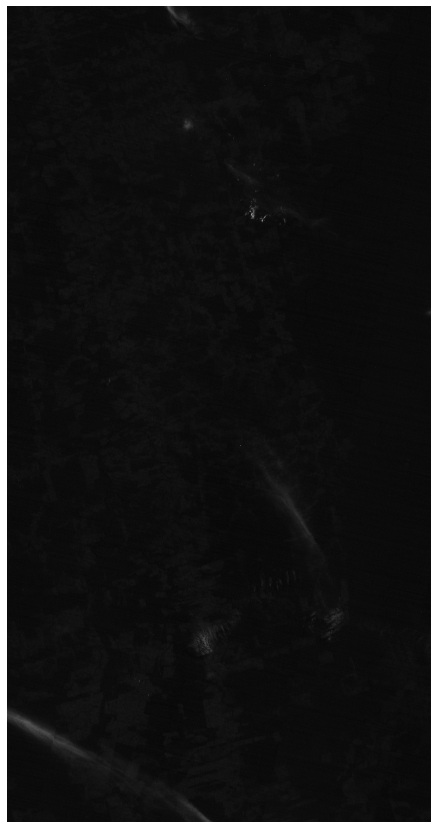

In [27]:
plt.figure(figsize=(15,15))
plt.imshow(cirrus_t0, cmap=plt.cm.gray)
# title_name = 'ResUnet'
plt.axis('off')
# plt.savefig('figures/Para' + title_name + ' error mask.png', dpi=150, bbox_inches='tight')

In [28]:
print(np.min(cirrus_t0), np.average(cirrus_t0), np.max(cirrus_t0))

1.0 9.405302 161.0


In [29]:
# threshold = 20
# threshold = 18
threshold = 19

thin_cloud_mask = np.zeros_like(cirrus_t0).astype(np.uint8)
thin_cloud_mask[cirrus_t0 > threshold] = 1
thin_cloud_mask[cirrus_t1 > threshold] = 1


(-0.5, 9202.5, 17729.5, -0.5)

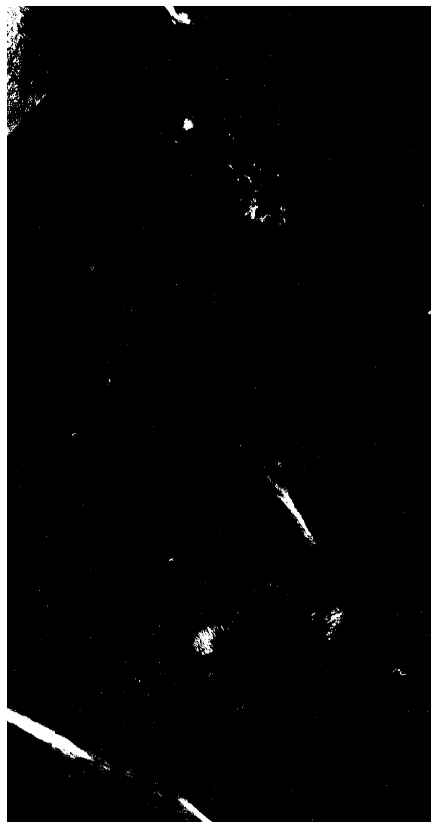

In [30]:
plt.figure(figsize=(15,15))
plt.imshow(thin_cloud_mask, cmap=plt.cm.gray)
# title_name = 'ResUnet'
plt.axis('off')
# plt.savefig('figures/Para' + title_name + ' error mask.png', dpi=150, bbox_inches='tight')

In [31]:


label_mask_with_thresholded_clouds = label_mask.copy()
label_mask_with_thresholded_clouds[thin_cloud_mask == 1] = 2

(-0.5, 9202.5, 17729.5, -0.5)

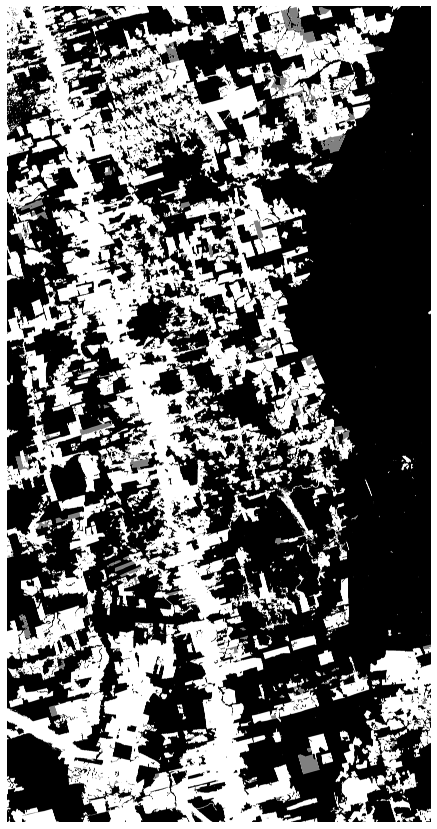

In [32]:
plt.figure(figsize=(15,15))
plt.imshow(label_mask_with_thresholded_clouds, cmap=plt.cm.gray)
# title_name = 'ResUnet'
plt.axis('off')
# plt.savefig('figures/Para' + title_name + ' error mask.png', dpi=150, bbox_inches='tight')

In [33]:
print(np.unique(label_with_cloud_mask, return_counts=True))
print(np.unique(label_mask_with_thresholded_clouds, return_counts=True))

(array([0., 1., 2.], dtype=float32), array([100994609,   1842247,  60332334], dtype=int64))
(array([0, 1, 2], dtype=uint8), array([101035639,   1799709,  60333842], dtype=int64))


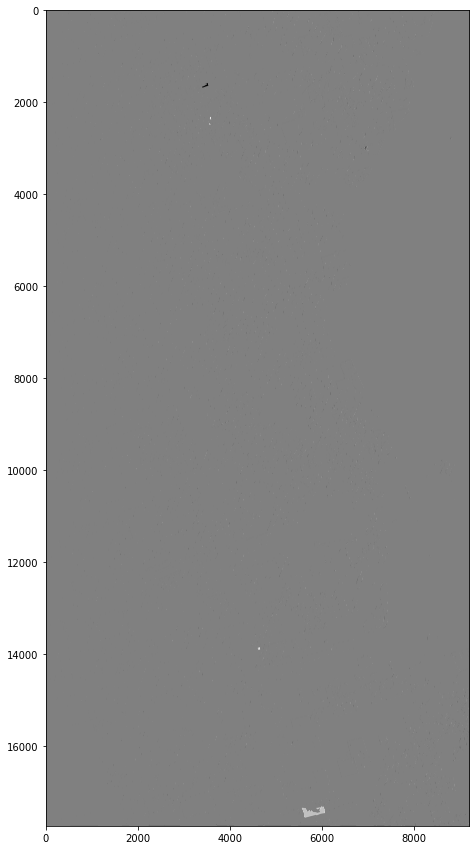

In [43]:
dif = np.squeeze(label_with_cloud_mask) - np.squeeze(label_mask_with_thresholded_clouds)
plt.figure(figsize=(15,15))
plt.imshow(dif, cmap=plt.cm.gray)
# title_name = 'ResUnet'
# plt.axis('off')
# plt.savefig('figures/Para' + title_name + ' error mask.png', dpi=150, bbox_inches='tight')

In [42]:
print(np.unique(dif, return_counts=True))

(array([-2., -1.,  0.,  1.,  2.], dtype=float32), array([    87669,      8726, 162933359,     55286,     84150], dtype=int64))


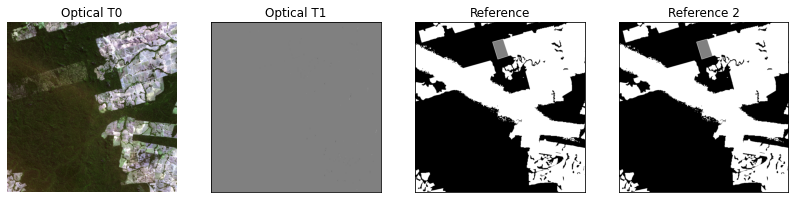

In [38]:
previewLims = np.array([15000, 17000, 0, 2000])
_plt.plotCropSample4(image_stack[...,[1,2,3]], dif,
        label_with_cloud_mask, label_mask_with_thresholded_clouds, 
        lims = previewLims, 
        titles = ['Optical T0', 'Optical T1', 'Reference', 'Reference 2'],
        cmaps = [plt.cm.gray, plt.cm.gray, plt.cm.gray, plt.cm.gray],
        maskBackground = [False, False, False, False],
        invertMask = [False, False, False, False])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


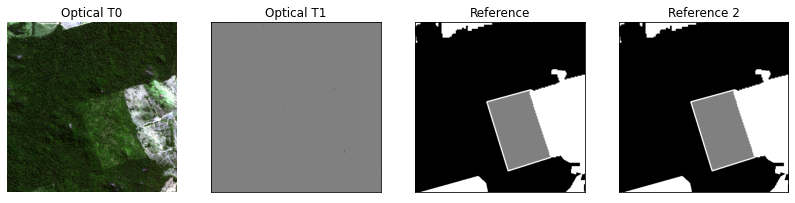

In [41]:
previewLims = np.array([15000, 15500, 700, 1200])
_plt.plotCropSample4(image_stack[...,[11,12,13]], dif,
        label_with_cloud_mask, label_mask_with_thresholded_clouds, 
        lims = previewLims, 
        titles = ['Optical T0', 'Optical T1', 'Reference', 'Reference 2'],
        cmaps = [plt.cm.gray, plt.cm.gray, plt.cm.gray, plt.cm.gray],
        maskBackground = [False, False, False, False],
        invertMask = [False, False, False, False])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


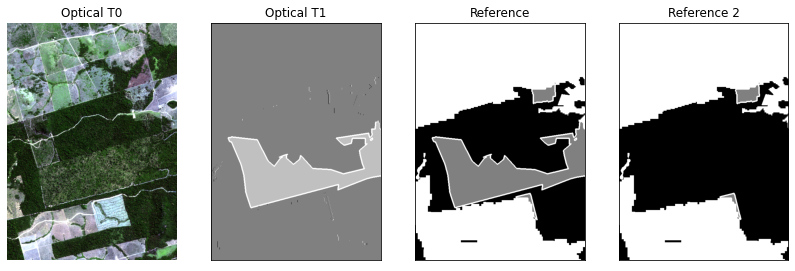

In [46]:
previewLims = np.array([17000, 17700, 5500, 6000])
_plt.plotCropSample4(image_stack[...,[11,12,13]], dif,
        label_with_cloud_mask, label_mask_with_thresholded_clouds, 
        lims = previewLims, 
        titles = ['Optical T0', 'Optical T1', 'Reference', 'Reference 2'],
        cmaps = [plt.cm.gray, plt.cm.gray, plt.cm.gray, plt.cm.gray],
        maskBackground = [False, False, False, False],
        invertMask = [False, False, False, False])